# Building Machine Learning APIs With FastAPI


## Introduction
In this project aims I will develop a machine learning model for predicting sepsis in patients where will;

` - Develop a predictive model to identify patients at risk of developing sepsis.`
`- Utilize machine learning techniques to analyze clinical data and extract patterns indicative of sepsis.`
`- Provide healthcare professionals with a tool for early detection and intervention in sepsis cases.`

#  Research Questions
1. What is the distribution of Sepsis
2. What is the distribution of Age
3. How Many Patients have Insurance
4. Is Blood Pressure Affected by Age
5. How many patients in each BMI category have sepsis?
6. How many of the patients fall under the Normal, Elevated and High Blood Pressure?


`Sepsis is a life-threatening condition that arises when the body's response to an infection causes inflammation throughout the body.`
`Early detection and timely intervention are critical for improving patient outcomes in sepsis cases.`

## Success Metrics
- Accuracy: The percentage of correctly predicted sepsis cases by the model.
- Sensitivity and Specificity: Measures of the model's ability to correctly identify positive and negative sepsis cases, respectively.
- Clinical Utility: Feedback from healthcare professionals on the practicality and effectiveness of the predictive model in real-world clinical settings.


# Hypothesis

## Hypothesis 1:

* Null Hypothesis (H0): There is no significant relationship between a patient's age and the likelihood of developing sepsis.

* Alternative Hypothesis (H1): The age of a patient is a significant factor that influences the likelihood of developing sepsis.

## Hypothesis 2
* Null Hypothesis (H0): There is no significant difference in the distribution of
blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

* Alternative Hypothesis (H1): There is a significant difference in the distribution of blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

##  Importations

In [1]:
# Importations
import pandas as pd
import numpy as np
import os

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Hypothesis Testing
from scipy import stats
import statistics as stat

# Import the label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE

# Splitting the data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Exporting the Model
import pickle

In [2]:
# Load the dataset
current_dir = os.getcwd()
train_data_path = os.path.join(current_dir, 'archive', 'Paitients_Files_Train.csv')
test_data_path = os.path.join(current_dir, 'archive', 'Paitients_Files_Test.csv')

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
train_data.shape,test_data.shape

((599, 11), (169, 10))

In [4]:
# Descriptive statistics of the train dataset
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [5]:
test_data.describe().T


,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


In [6]:
#Checking for Missing Values
train_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
#Checking test dataset for Missing Values
test_data.isna().sum()


ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [8]:
# Categorize the Sepssis column
train_data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

EDA

Univariate analysis

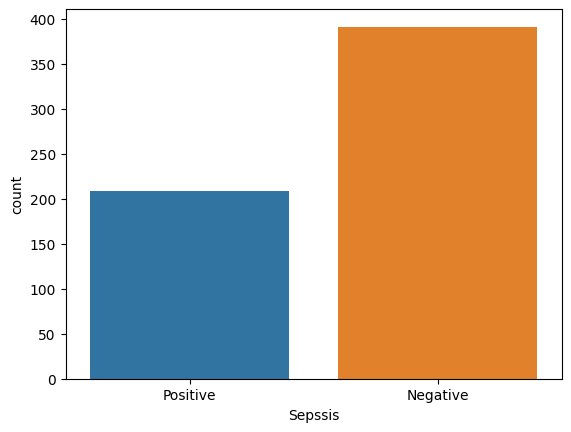

In [9]:
# Distribution of Sepssis
sns.countplot(x='Sepssis',data=train_data)

plt.show()

b. Age distribution in the dataset

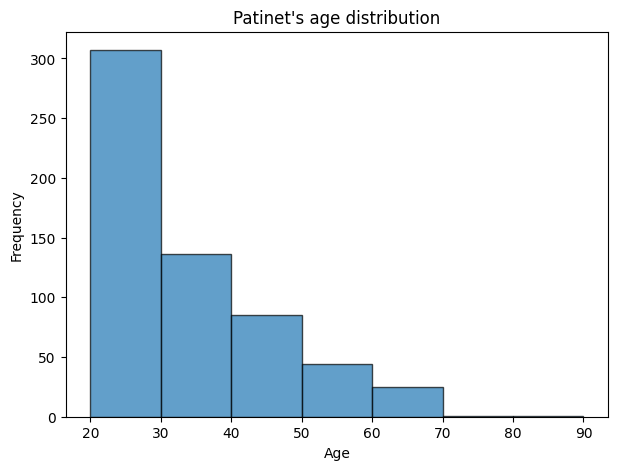

Mean Age: 33.29
Mean Age: 33.29
Minimum Age: 21
Maximum Age: 81


In [10]:


plt.figure(figsize=(7,5))
plt.hist(train_data['Age'],bins=7,range = (20,90),edgecolor='k',alpha=0.7)
plt.title("Patinet's age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# summary statistics
mean_age = train_data['Age'].mean()
print(f"Mean Age: {mean_age:.2f}")

median_age = train_data['Age'].median()
print(f"Mean Age: {mean_age:.2f}")

min_age = train_data['Age'].min()
print(f"Minimum Age: {min_age}")

max_age = train_data['Age'].max()
print(f"Maximum Age: {max_age}")

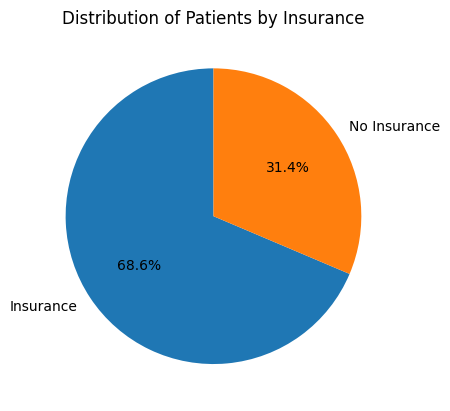

In [11]:
#Number o patients with insurance
insurance_count = train_data['Insurance'].value_counts()
labels = ['Insurance','No Insurance']
plt.title('Distribution of Patients by Insurance')

plt.pie(insurance_count,labels=labels,autopct='%1.1f%%', startangle=90)
plt.show()

D. impact o age on blood pressure

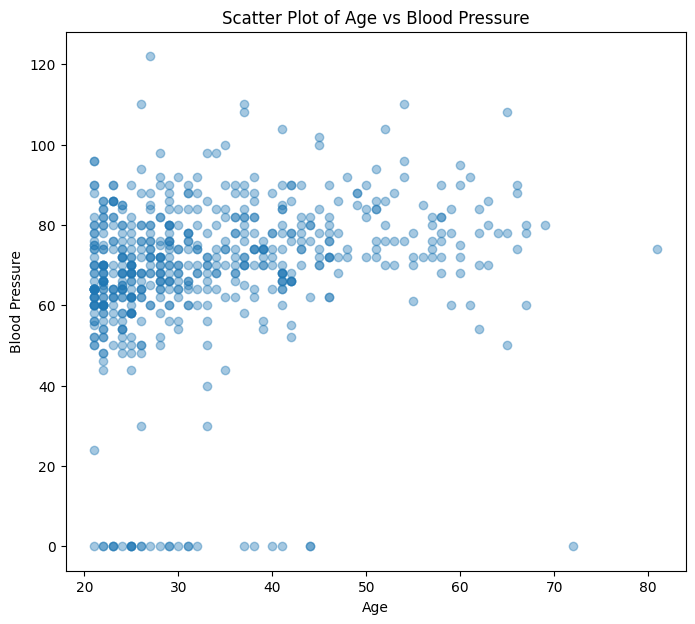

In [12]:
plt.figure(figsize=(8,7))
plt.scatter(train_data['Age'],train_data['PR'],alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title("Scatter Plot of Age vs Blood Pressure")
plt.show()

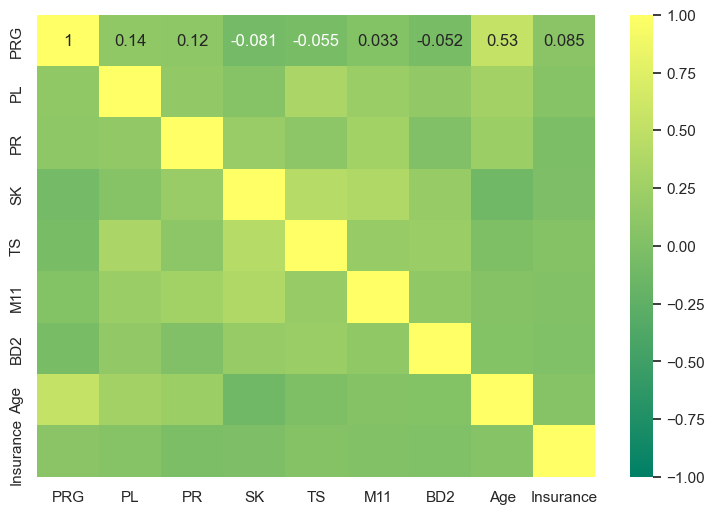

In [13]:
# Calculate correlation matrix using Pearson method, considering only numeric data
pearson_r = train_data.corr(method='pearson', numeric_only=True)

# Set Seaborn theme
sns.set_theme()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the heatmap of the correlation matrix
sns.heatmap(data=pearson_r, vmin=-1, vmax=1, annot=True, cmap='summer', ax=ax)

# Show the plot
plt.show()

HYPOTHESIS TESTING

In [14]:
# Filter the data for 'Negative' cases in the 'Sepssis' column
negative_sepsis = train_data[train_data['Sepssis'] == 'Negative']

In [15]:
# Filter the data for 'POSITIVE' cases in the 'Sepssis' column
positive_sepsis = train_data[train_data['Sepssis'] == 'Positive']

In [16]:
positive_sepsis_numeric = positive_sepsis.select_dtypes(include=['number'])
negative_sepsis_numeric = negative_sepsis.select_dtypes(include=['number'])

In [17]:
# Set significance level (alpha)
alpha = 0.05

 # Perform a two-sample independent t-test
t_stat, p_value = stats.ttest_ind(positive_sepsis_numeric, negative_sepsis_numeric, equal_var=False)

In [18]:
# Perform a two-sample independent t-test with equal variance set to False
t_stat, p_value = stats.ttest_ind(positive_sepsis_numeric, negative_sepsis_numeric, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: [ 4.8425339  11.6142648   1.41100511  1.75179916  3.26125478  8.34187613
  4.20028627  5.39802884  1.558312  ], P-value: [1.92424714e-06 1.06769140e-26 1.59108577e-01 8.06562047e-02
 1.22804192e-03 8.87089036e-16 3.39405578e-05 1.08595928e-07
 1.19873197e-01]


In [19]:
# Compare p-value to alpha to make a decision
if (p_value < alpha).any():
    print("Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age between patients with and without sepsis.")


Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\App

<Axes: xlabel='Age', ylabel='Count'>

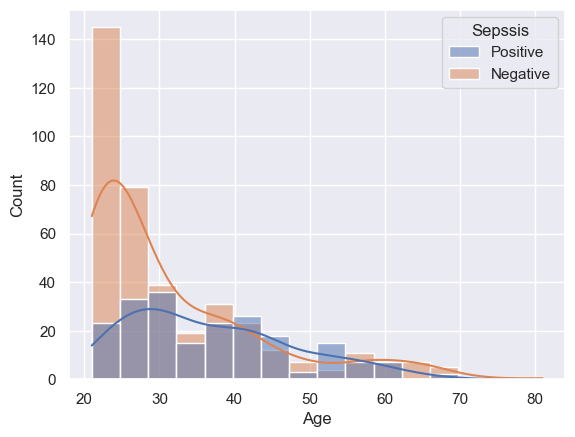

In [20]:
sns.histplot(data=train_data,x='Age',hue='Sepssis',kde=True)

data preprocessing

In [21]:
#Renaming the seppsis, BMI and Blood pressure columns
train_data = train_data.rename(columns={'Sepssis': 'Sepsis'})
train_data = train_data.rename(columns={'M11': 'BMI'})
train_data = train_data.rename(columns={'PR': 'BP'})

# Test dataset
test_data = test_data.rename(columns={'M11': 'BMI'})
test_data = test_data.rename(columns={'PR': 'BP'})

train_data.head()


,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [22]:
#The number each of the categories occurs
print('The categories in the Spesis column are: ')
print(train_data['Sepsis'].value_counts())
#The number each of the Insurance Column
print('The categories in the Insurance column are: ')
print(train_data['Insurance'].value_counts())
#The number each of the categories occurs
print('The categories in the PRG column are: ')
print(train_data['PRG'].value_counts())

The categories in the Spesis column are: 
Sepsis
Negative    391
Positive    208
Name: count, dtype: int64
The categories in the Insurance column are: 
Insurance
1    411
0    188
Name: count, dtype: int64
The categories in the PRG column are: 
PRG
1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: count, dtype: int64


In [23]:
test_data.head()



,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## Feature Encoding

In [24]:
# Initializing class Label Encoder
label_encoder = LabelEncoder()
# Encoding the target column
train_data['Sepsis'] = label_encoder.fit_transform(train_data['Sepsis'])

In [25]:
# Splitting the dataset into features (X) and target variable (y)
X = train_data.drop('Sepsis', axis=1)
y = train_data['Sepsis']

In [26]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables in X
X_encoded = X.apply(label_encoder.fit_transform)

# Ensure y is numeric (if needed)
# Assuming y is already encoded or numeric, no preprocessing needed for y

# Re-run SMOTE with preprocessed data
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check value counts of y_resampled
print(y_resampled.value_counts())

Sepsis
1    391
0    391
Name: count, dtype: int64


data splitting

In [27]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [28]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((625, 10), (157, 10), (625,), (157,))

In [29]:
#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")

#Fitting and transforming the selected columns in the training data set
X_train_scaled=scaler.fit_transform(X_train)

#Transforming the selected columns  in the evaluation dataset
X_eval_scaled= scaler.transform(X_eval)

In [30]:
#Checking on the scaled training set
X_train_scaled.head()

,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance
547,1.493692,-0.021083,0.194570,-0.176810,-0.112268,1.145404,0.042794,-1.454545,-0.543998,0.708805
474,1.063470,-0.021083,-0.371506,-0.550141,-1.213557,-0.803034,-0.577091,-1.634307,-0.909785,0.708805
707,-1.223187,-1.218975,0.494258,0.445409,-0.505586,-0.803034,0.607984,1.511533,0.004682,0.708805
293,-0.003244,-0.919502,0.094675,-1.794580,1.775654,1.491793,1.300797,0.653576,-0.909785,0.708805
729,0.762904,-0.320556,0.094675,-0.799029,0.281049,0.474276,-0.959962,-1.152217,-0.452552,0.708805


In [31]:
#To check on the scaled evaluation on the predictor set
X_eval_scaled.head()

,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance
378,0.497699,-0.021083,0.993736,0.320966,-1.213557,-0.803034,2.030074,-0.996968,-0.178211,-1.410826
309,0.091051,-0.620029,-0.038520,-0.176810,0.438376,1.556741,0.024562,1.339941,-0.361105,0.708805
668,-1.435351,0.877336,1.459916,1.316516,0.910356,2.119623,0.243345,0.146974,2.016510,0.708805
112,-1.069957,-0.919502,-1.203970,0.445409,0.910356,-0.629839,-0.212453,-1.274782,-1.001232,0.708805
583,1.705856,1.176809,-0.837686,0.445409,-1.213557,-0.803034,1.027318,-1.291124,0.736256,0.708805


In [32]:
# Defining a list of models that will be evaluated
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
]

# Initializing an empty list to store the model results
results_list = []

# Iterate over the models and train, evaluate, and store the results
for model_name, model in models:
    # Fitting the models to the training dataset
    model.fit(X_train_scaled, y_train)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_eval_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    auc_roc = roc_auc_score(y_eval, y_pred)

    # Store the results in a dictionary
    model_results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }

    # Append the model results to the list
    results_list.append(model_results)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)


[LightGBM] [Info] Number of positive: 313, number of negative: 312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500800 -> initscore=0.003200
[LightGBM] [Info] Start training from score 0.003200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [33]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.707006,0.716216,0.679487,0.697368,0.706832
1,Random Forest,0.777070,0.759036,0.807692,0.782609,0.777264
2,Gradient Boosting,0.738854,0.746667,0.717949,0.732026,0.738721
3,Support Vector Machine,0.757962,0.738095,0.794872,0.765432,0.758195
4,Gaussian Naive Bayes,0.726115,0.721519,0.730769,0.726115,0.726144
5,K-Nearest Neighbors,0.757962,0.732558,0.807692,0.768293,0.758277
6,Decision Tree,0.732484,0.736842,0.717949,0.727273,0.732392
7,XGBoost,0.757962,0.743902,0.782051,0.762500,0.758114
8,LightGBM,0.815287,0.818182,0.807692,0.812903,0.815239


## Hyperparameter Tuning

In [34]:
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
# Defining the parameter grid for Random Forest m
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

In [36]:
# Defining a random forest model
rf = RandomForestClassifier(random_state=42)
#Perfoming a grid search using cross validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [37]:
# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [38]:
#Displaying the best parameters
print(f"The best hyperparameters for the Random Forest model are:\n{best_params_rf}")

The best hyperparameters for the Random Forest model are:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Define the models with the best hyperparameters
rf_model_tuned = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)


In [40]:
# Fit the models to the training data
rf_model_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [41]:
# Make predictions on the evaluation data
y_pred_rf = rf_model_tuned.predict(X_eval_scaled)

In [42]:
# Calculate the evaluation scores
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
precision_rf = precision_score(y_eval, y_pred_rf)
recall_rf = recall_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf)
auc_roc_rf = roc_auc_score(y_eval, y_pred_rf)

### Objects to Export

In [43]:
components = {
    'label_encoder': label_encoder,
    'scaler': scaler,
    'imbalance': smote,
    'grid_search_rfc':grid_search_rf,
    'model': rf_model_tuned
}

In [44]:

# Exporting the Model
with open ('ML_Model.pkl', 'wb') as file:
    pickle.dump(components, file)